In [ ]:
# Fist install the library

#%pip install aepy

In [2]:
import os
import sys

notebook_dir = os.path.abspath('')
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np

from sklearn.metrics import accuracy_score
from keras_core import utils

from aepy.data.datasets import load_MNIST
from aepy.data.utils import evaluate, display_diff, add_noise
from aepy.models.ae.ae_model import AE
from aepy.models.base.default_architectures import VanillaEncoder, VanillaDecoder
from aepy.pipelines.training import TrainingPipeline

Using TensorFlow backend


2023-11-20 14:49:34.440057: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Download and preprocess the dataset. In this example, the selected dataset is the well-known MNIST composed of handwritten number images.

In [3]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST(persistant=True)

# Obtaint number of clasess
n_classes = len(set(y_train))

# Convert labels to categorical
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

2023-11-20 14:49:45 [INFO]: train-images-idx3-ubyte.gz already exists.
2023-11-20 14:49:45 [INFO]: train-labels-idx1-ubyte.gz already exists.
2023-11-20 14:49:45 [INFO]: t10k-images-idx3-ubyte.gz already exists.
2023-11-20 14:49:45 [INFO]: t10k-labels-idx1-ubyte.gz already exists.


Since we want to train a denoising autoencoder, we also need to add some noise to the images.
The noise factor should be a float between 0 and 1.

In [4]:
# Add noise to the train and test data
x_train_noisy = add_noise(x_train, noise_factor=0.4)
x_test_noisy = add_noise(x_test, noise_factor=0.4)

x_train = x_train.reshape(x_train.shape[0], -1)
x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], -1)

Compose the dictionaries to feed the autoencoder during training and evaluation phase.
Note in train how the train labels correspond to the original MNIST images (without noise).

In [5]:
train_data = dict(data=x_train_noisy.astype(float), labels=x_train)
test_data = dict(data=x_test_noisy.astype(float), labels=y_test)

Since the denoising autoencoder in structure is a normal autoencoder (only its functionality varies), the encoder and decoder are the vanilla ones, you can specify the depth and number of neurons per layer in each using the layers_conf parameter.

In [6]:
# Model creation
model = AE(input_dim=(x_train_noisy.shape[0], x_train_noisy.shape[1]), 
            latent_dim=2, encoder=VanillaEncoder, decoder=VanillaDecoder, layers_conf=[64, 32])

Define the training pipeline. There you can fix some hyperparameters realted to the training phase of the autoencoder, like learning rate, bath size, numer of epochs, etc

In [7]:
pipe = TrainingPipeline(name='training_pipeline',
                        model=model, num_epochs=10)

trained_model = pipe(train_data=train_data)

2023-11-20 14:50:05 [INFO]: +++ training_pipeline +++
2023-11-20 14:50:05 [INFO]: Creating folder in ../output_dir/training_pipeline_2023-11-20_14-50-05


Epoch 1/10


2023-11-20 14:50:06.317025: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-11-20 14:50:06.705492: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.
2023-11-20 14:50:32.820860: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2010003b80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-11-20 14:50:32.820918: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-11-20 14:50:32.944884: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1700488233.941853   39596 device_compiler.h:187] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-20 14:50:33.944727: E external/local


Epoch 1: total_loss improved from inf to 0.09578, saving model to ../output_dir/training_pipeline_2023-11-20_14-50-05/model.weights.h5
469/469 - 32s - 68ms/step - reconstruction_loss: 0.0958 - total_loss: 0.0958
Epoch 2/10


2023-11-20 14:50:38.128989: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-11-20 14:50:38.653653: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.



Epoch 2: total_loss improved from 0.09578 to 0.07587, saving model to ../output_dir/training_pipeline_2023-11-20_14-50-05/model.weights.h5
469/469 - 4s - 8ms/step - reconstruction_loss: 0.0759 - total_loss: 0.0759
Epoch 3/10


2023-11-20 14:50:41.459717: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.



Epoch 3: total_loss improved from 0.07587 to 0.07100, saving model to ../output_dir/training_pipeline_2023-11-20_14-50-05/model.weights.h5
469/469 - 3s - 7ms/step - reconstruction_loss: 0.0710 - total_loss: 0.0710
Epoch 4/10

Epoch 4: total_loss improved from 0.07100 to 0.06861, saving model to ../output_dir/training_pipeline_2023-11-20_14-50-05/model.weights.h5
469/469 - 3s - 6ms/step - reconstruction_loss: 0.0686 - total_loss: 0.0686
Epoch 5/10

Epoch 5: total_loss improved from 0.06861 to 0.06732, saving model to ../output_dir/training_pipeline_2023-11-20_14-50-05/model.weights.h5
469/469 - 3s - 6ms/step - reconstruction_loss: 0.0673 - total_loss: 0.0673
Epoch 6/10

Epoch 6: total_loss improved from 0.06732 to 0.06672, saving model to ../output_dir/training_pipeline_2023-11-20_14-50-05/model.weights.h5
469/469 - 3s - 6ms/step - reconstruction_loss: 0.0667 - total_loss: 0.0667
Epoch 7/10

Epoch 7: total_loss improved from 0.06672 to 0.06639, saving model to ../output_dir/training_pi

Evaluation phase using test data

In [8]:
y_hat = trained_model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


Finally the original images with noise can be graphically compared with the output images of the autoencoder.

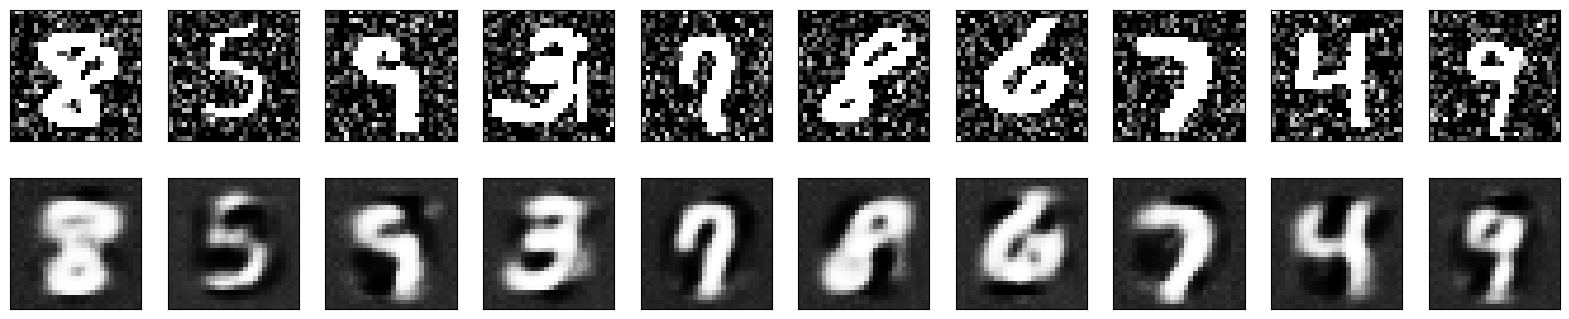

In [9]:
display_diff(x_test_noisy, y_hat['recon'])